<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2022-2023</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook : Neural Network </font></p>
<p><font size = "4"> Students: Daniel TERAN</p>
</p></br>
</p>
</CENTER>

We built an Artificial Neural Networks (ANN) with one input layer, one hidden layer, and one output layer. We will apply this neural network to find non-linear boundaries 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn.datasets import   make_moons
from sklearn.model_selection import train_test_split

#### 1: Define  sigmoid  activiation function




In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#### 2: Define prediction function

In [3]:
def myPrediction(W, U,x):
    a = np.dot(W,x)
    h= sigmoid(a)
    a2 = np.dot(U,h)
    t = sigmoid(a2)
    return t,h

#### 3: Build our own neural network 

In [4]:
def myNeuralNetwork(X, Y, hidden_dim, alpha, W, U):

#X: input of x_n dim
#Y: output of y_n dim
#hidden_dim: number of neurones to create
 
    for n in range(X.shape[0]):
        x = np.array(X[n,:], ndmin=2).T
        y = np.array(Y[n], ndmin=2).T

        t,h = myPrediction(W,U,x)

        # update the weight for the link between the hidden and the output layers
        U +=  np.dot(alpha *(y-t) * t * (1-t),h.T)

        # update the weight for the link between the input and the hidden layers 
        f1 = np.dot((U*(y-t)) * t * (1-t), h)
        W += np.dot(alpha * (f1*(1-h)), x.T)

    return W, U

#### 4: Create non-linear data by using make_moons function from sklearn dataset. Then use train_test_split function to divide the created dataset into training set and test set

In [5]:
num_points = 300

X, y =  make_moons(num_points, noise = 0.05)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((240, 2), (60, 2), (240,), (60,))

#### 5: Visualize the dataset 

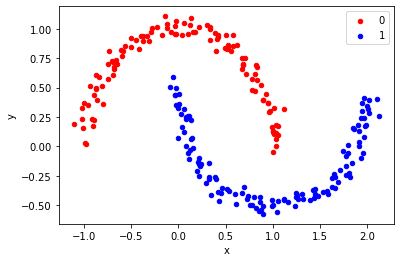

In [7]:
# ALL dataset
df = pd.DataFrame(dict(x=X_train[:,0], y = X_train[:,1], label = y_train))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind ='scatter', x = 'x', y= 'y', label = key, color = colors[key])
plt.show()

#### 6: Train our network with hidden dimensionality = 10 with epochs = 5. Then test the performance of our prediction  

In [8]:
hidden_dim = 10
alpha= 0.01 # learning rate for gradient descent
input_dim = 2

# weight matrix for Hidden layer 
W = np.random.randn(hidden_dim, input_dim)  
# weight matrix for output layer
U = np.random.randn(1, hidden_dim) 

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    W, U = myNeuralNetwork(X_train, y_train, hidden_dim, alpha, W, U)

In [9]:
# using prediction function to predict the labels of test set

for i in X_val:
    print(myPrediction(W, U, i)[0])

[0.43178702]
[0.67530521]
[0.64228295]
[0.58031658]
[0.48792154]
[0.51775095]
[0.43208802]
[0.64553445]
[0.51764801]
[0.59801721]
[0.48833007]
[0.53171807]
[0.47122423]
[0.66734319]
[0.61793492]
[0.6691424]
[0.65027662]
[0.42312172]
[0.54355105]
[0.44955814]
[0.42906383]
[0.42114107]
[0.4178427]
[0.41637012]
[0.63217406]
[0.58935732]
[0.58661317]
[0.55529816]
[0.55275426]
[0.61724054]
[0.58051329]
[0.63755793]
[0.63217475]
[0.41057763]
[0.448485]
[0.58637152]
[0.47795403]
[0.47402888]
[0.62523358]
[0.63884581]
[0.6722618]
[0.65836936]
[0.55191816]
[0.66456451]
[0.48207622]
[0.62206949]
[0.41484541]
[0.66614964]
[0.59935937]
[0.67440943]
[0.61099185]
[0.45532271]
[0.67429318]
[0.41808547]
[0.40943667]
[0.54446289]
[0.62802271]
[0.54385413]
[0.6103186]
[0.4160185]


#### 7: Train our network with hidden dimensionality = 100. Then test the performance of our prediction. Give your remarks 

In [10]:
hidden_dim = 100
alpha= 0.01 # learning rate for gradient descent
input_dim = 2

# weight matrix for Hidden layer 
W = np.random.randn(hidden_dim, input_dim)  
# weight matrix for output layer
U = np.random.randn(1, hidden_dim) 

# epochs is the number of times the training data set is used for training
epochs = 40

for e in range(epochs):
    W, U = myNeuralNetwork(X_train, y_train, hidden_dim, alpha, W, U)

In [11]:
# using prediction function to predict the labels of test set
for i in X_val:
    print(myPrediction(W, U, i)[0])

[0.09135798]
[0.4787075]
[0.96373348]
[0.25445733]
[0.11621902]
[0.14498877]
[0.14360122]
[0.96717319]
[0.14571298]
[0.31873021]
[0.11807231]
[0.36418771]
[0.10295655]
[0.82082572]
[0.44583563]
[0.81727671]
[0.95491327]
[0.14301289]
[0.17530178]
[0.09109105]
[0.09824015]
[0.36234217]
[0.13279617]
[0.19322394]
[0.96226204]
[0.92237249]
[0.91254969]
[0.76753377]
[0.76075477]
[0.39551164]
[0.25182761]
[0.96443347]
[0.67981911]
[0.30894393]
[0.07999154]
[0.92409535]
[0.1063056]
[0.1027703]
[0.3794053]
[0.95854285]
[0.66964005]
[0.92998721]
[0.18579901]
[0.93475033]
[0.11279163]
[0.36378563]
[0.22378299]
[0.8955026]
[0.93919715]
[0.48086987]
[0.94602649]
[0.09359174]
[0.516432]
[0.12264235]
[0.28398305]
[0.60095608]
[0.62323577]
[0.67167427]
[0.33922455]
[0.34522894]


#### Parmi les valeurs observées en sortie du réseau neuronal simple, certaines valeurs ont idéalement un 0 et d'autres un 1. L'entraînement du réseau avec une couche cachée de 10 ou 100 neurones ne varie pas beaucoup, ils ont un 1. Mais si nous augmentons les itérations d'apprentissage, les époques, nous pouvons remarquer différentes valeurs, certaines tendant vers 0 et d'autres vers 1.